In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import train_test_split

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train=pd.read_csv('new_data/trainset_clean_dummy.csv')

In [3]:
df_train.shape

(59400, 109)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 109 entries, id to waterpoint_type_group_other
dtypes: float64(2), int64(104), object(3)
memory usage: 49.4+ MB


In [5]:
print(df_train.columns)

Index(['id', 'existing year', 'gps_height', 'longitude', 'latitude',
       'num_private', 'population', 'status_group', 'installer_ces',
       'installer_community',
       ...
       'quantity_unknown', 'source_class_groundwater', 'source_class_surface',
       'source_class_unknown', 'waterpoint_type_group_cattle trough',
       'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other'],
      dtype='object', length=109)


In [6]:
# print(df_train.dtypes)

In [7]:
df_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [8]:
df_train['existing year'].value_counts()[:5]

unknown    20709
3           2740
1           2303
2           2129
5           1980
Name: existing year, dtype: int64

In [9]:
df_train['existing year'] = df_train['existing year'].replace({'unknown':0})

In [10]:
df_train['existing year'].value_counts()[:5]

0    20709
3     2740
1     2303
2     2129
5     1980
Name: existing year, dtype: int64

In [11]:
# df_train[['existing year','population']] = df_train[['existing year','population']].apply(pd.to_numeric)

In [12]:
df_train['existing year'] = df_train['existing year'].apply(pd.to_numeric)

In [13]:
print(df_train['existing year'].dtypes)

int64


In [14]:
df_train['population'].value_counts()[:5]

<built-in function zeros>    21381
1                             7025
200                           1940
150                           1892
250                           1681
Name: population, dtype: int64

In [15]:
df_train['population']=df_train['population'].replace({'<built-in function zeros>':0.0})

In [16]:
df_train['population'].value_counts()[:5]

0.0    21381
1       7025
200     1940
150     1892
250     1681
Name: population, dtype: int64

In [17]:
print(df_train['population'].dtypes)

object


In [18]:
# df_train['population'] = df_train['population'].astype(float)
df_train['population'] = df_train['population'].apply(pd.to_numeric,errors='ignore')

In [19]:
# df_train['population'].value_counts()[:5]

In [20]:
print(df_train['population'].dtypes)

float64


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 109 entries, id to waterpoint_type_group_other
dtypes: float64(3), int64(105), object(1)
memory usage: 49.4+ MB


In [22]:
# print(df_train.apply(lambda x: sum(x.isnull())))

### Split training datasets to training and validation sets 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'status_group'], df_train['status_group'], test_size=0.1, random_state=10)
print(len(X_train), len(X_test))

53460 5940


In [24]:
X_train[:5]

,id,existing year,gps_height,longitude,latitude,num_private,population,installer_ces,installer_community,installer_danida,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
6191,32154,25,147,37.798787,-7.378011,0,2000.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7705,6131,0,0,36.361102,-6.125086,0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
24710,34216,2,1806,35.581231,-3.757245,0,255.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1464,2744,2,1269,37.886287,-4.390882,0,80.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
44355,36293,0,0,33.412691,-2.986055,0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
y_train[:5]

6191     functional
7705     functional
24710    functional
1464     functional
44355    functional
Name: status_group, dtype: object

### 1. Random Forest

- Train and Score models(Validation)

In [26]:
X_test.min()[:5]

id               20.000000
existing year    -2.000000
gps_height      -55.000000
longitude         0.000000
latitude        -11.564324
dtype: float64

In [27]:
X_test.max()[:5]

id               7.422700e+04
existing year    5.300000e+01
gps_height       2.585000e+03
longitude        4.032340e+01
latitude        -2.000000e-08
dtype: float64

In [28]:
(X_train - X_train.min())[:5]

,id,existing year,gps_height,longitude,latitude,num_private,population,installer_ces,installer_community,installer_danida,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
6191,32154.0,32.0,237.0,37.798787,4.271429,0.0,2000.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7705,6131.0,7.0,90.0,36.361102,5.524355,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24710,34216.0,9.0,1896.0,35.581231,7.892195,0.0,255.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1464,2744.0,9.0,1359.0,37.886287,7.258558,0.0,80.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44355,36293.0,7.0,90.0,33.412691,8.663386,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Find Optimal Parameters

In [33]:
# Nomilisation
X_test_nom=(X_test - X_test.min())/(X_test.max() - X_test.min())
X_train_nom=(X_train - X_train.min())/(X_train.max() - X_train.min())

In [42]:
from sklearn.cross_validation import cross_val_score

In [50]:
# for nonmalised data
for i in [2,5,10,20]:
    for j in ['auto',5,10,20]:        
        model = RandomForestClassifier(n_estimators=1000,min_samples_split=i,  max_features=j, random_state=3134)
        X_train_nom=(X_train - X_train.min())/(X_train.max() - X_train.min())
        s=cross_val_score(model, X_train_nom, y_train, scoring=None, cv=None, pre_dispatch='2*n_jobs')
        print(i,j,s.mean(), s.std())

2 auto 0.7946128909463207 0.0014547621915275302
2 5 0.7931538687418161 0.00212818249056516
2 10 0.7946128909463207 0.0014547621915275302
2 20 0.7954546512411634 0.002610920582232642
5 auto 0.7979799478720078 0.0022330161383764583
5 5 0.7984289100004726 0.0025979201246178153
5 10 0.7979799478720078 0.0022330161383764583
5 20 0.7985036934570738 0.0033398292935128584
10 auto 0.7976993705548502 0.0035314989990659277
10 5 0.7961468005331165 0.0038145353849168956
10 10 0.7976993705548502 0.0035314989990659277
10 20 0.7981856913443508 0.0034313870585746596
20 auto 0.7919940905879338 0.0025694746813783058
20 5 0.7898804100215715 0.0026180894372407194
20 10 0.7919940905879338 0.0025694746813783058
20 20 0.7941452211439683 0.0030475265796200456


In [43]:
# for non-nonmalised data
for i in [5,10,20]:
    for j in [5,10,20]:        
        model = RandomForestClassifier(n_estimators=1000,min_samples_split=i,  max_features=j, random_state=3134)
        s=cross_val_score(model, X_train, y_train, scoring=None, cv=None, pre_dispatch='2*n_jobs')
        print(i,j,s.mean(), s.std())

5 5 0.7980360897892513 0.0024650460939418194
5 10 0.7978303305705916 0.0025093164040701694
5 20 0.7981856787472975 0.003114004770914106
10 5 0.7959971517390673 0.0037087229079051823
10 10 0.7979051549676163 0.003522884239921716
10 20 0.7982979121935712 0.002876425756635953
20 5 0.7895063006335015 0.0027442232028750185
20 10 0.7920502167588607 0.0025539704485788677
20 20 0.7939768615267678 0.0031733316600707257


In [31]:
# 1
modelRFC = RandomForestClassifier(n_estimators=1000,min_samples_split=20,max_features=20,criterion='gini',random_state=3134)

In [34]:
rfc_time_start=time.time()
modelRFC.fit(X_train_nom, y_train)
rfc_time_end=time.time()
print('Execution time: ',(rfc_time_end-rfc_time_start))

Execution time:  206.80529260635376


In [35]:
scoreRFC= modelRFC.score(X_test_nom,y_test)

In [46]:
print(scoreRFC.mean(), scoreRFC.std())

0.7966329966329966 0.0


In [51]:
# 2
modelRFC2 = RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features='auto',criterion='gini',random_state=3134)

In [53]:
rfc_time_start2=time.time()
modelRFC2.fit(X_train_nom, y_train)
rfc_time_end2=time.time()
print('Execution time: ',(rfc_time_end2-rfc_time_start2))

Execution time:  147.59668254852295


In [54]:
scoreRFC2= modelRFC2.score(X_test_nom,y_test)
print(scoreRFC2.mean(), scoreRFC2.std())

0.7925925925925926 0.0


In [55]:
# 3
modelRFC3 = RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=10,criterion='gini',random_state=3134)
rfc_time_start3=time.time()
modelRFC3.fit(X_train_nom, y_train)
rfc_time_end3=time.time()
print('Execution time: ',(rfc_time_end3-rfc_time_start3))

Execution time:  148.51483297348022


In [56]:
scoreRFC3= modelRFC3.score(X_test_nom,y_test)
print(scoreRFC3.mean(), scoreRFC3.std())

0.7925925925925926 0.0


In [31]:
# 4 for non-nomalised X
modelRFC4 = RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=10,criterion='gini',random_state=3134)
rfc_time_start4=time.time()
modelRFC4.fit(X_train, y_train)
rfc_time_end4=time.time()
print('Execution time: ',(rfc_time_end4-rfc_time_start4))

Execution time:  136.07936644554138


In [32]:
scoreRFC4= modelRFC4.score(X_test,y_test)
print(scoreRFC4.mean(), scoreRFC4.std())

0.8072390572390572 0.0


In [39]:
# 5 for non-nomalised X
modelRFC5 = RandomForestClassifier(n_estimators=1000,min_samples_split=10,max_features=10,criterion='gini',random_state=3134)
rfc_time_start5=time.time()
modelRFC5.fit(X_train, y_train)
rfc_time_end5=time.time()
print('Execution time: ',(rfc_time_end5-rfc_time_start5))

Execution time:  134.1155240535736


In [40]:
scoreRFC5= modelRFC5.score(X_test,y_test)
print(scoreRFC5.mean(), scoreRFC5.std())

0.8146464646464646 0.0


In [44]:
# 6 for non-nomalised X
modelRFC6 = RandomForestClassifier(n_estimators=1000,min_samples_split=10,max_features=20,criterion='gini',random_state=3134)
rfc_time_start6=time.time()
modelRFC6.fit(X_train, y_train)
rfc_time_end6=time.time()
print('Execution time: ',(rfc_time_end6-rfc_time_start6))

Execution time:  202.0429811477661


In [45]:
scoreRFC6= modelRFC6.score(X_test,y_test)
print(scoreRFC6.mean(), scoreRFC6.std())

0.8158249158249158 0.0


- Decision Trees

In [140]:
modelDTC = DecisionTreeClassifier()
dtc_time_start=time.time()
modelDTC.fit(X_train, y_train)
dtc_time_end=time.time()
print('Execution time: ',(dtc_time_end-dtc_time_start))

Excution time:  1.6924090385437012


In [ ]:
scoreDTC= modelDTC.score(X_test,y_test)

- Extra Trees

In [142]:
modelETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10,max_features=10)
etc_time_start=time.time()
modelETC.fit(X_train, y_train)
etc_time_end=time.time()
print('Execution time: ',(etc_time_end-etc_time_start))

Excution time:  154.04592323303223


In [143]:
scoreETC= modelETC.score(X_test,y_test)

In [144]:
print('Random Forest' ,scoreRFC)
print('Decision Tree', scoreDTC)
print('Extra Trees Classifiers', scoreETC)

Random Forest 0.8154882154882155
Decision Tree 0.7427609427609427
Extra Trees Classifiers 0.8079124579124579


- Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (6.0, 6.0)
labels=['functional','functional needs repair','non functional']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

Confusion matrix, without normalization
[[3019   26  223]
 [ 261   86   65]
 [ 609   24 1627]]


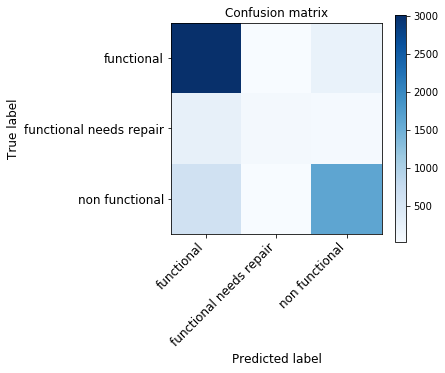

In [39]:
# 1. modelRFC for X_test nomilisation
# Compute confusion matrix
predict=modelRFC.predict(X_test_nom)
cm = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.92 0.01 0.07]
 [0.63 0.21 0.16]
 [0.27 0.01 0.72]]


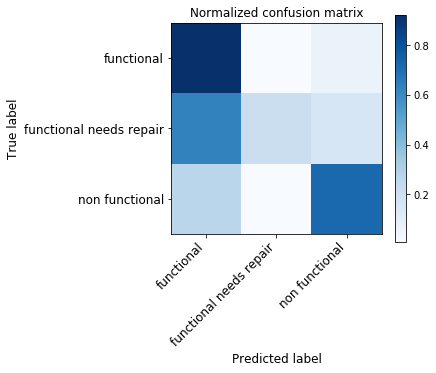

Test Score 0.7966329966329966


In [40]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
print('Test Score', cm.diagonal().sum()/float(cm.sum()))

Confusion matrix, without normalization
[[2890   97  281]
 [ 207  137   68]
 [ 457   35 1768]]


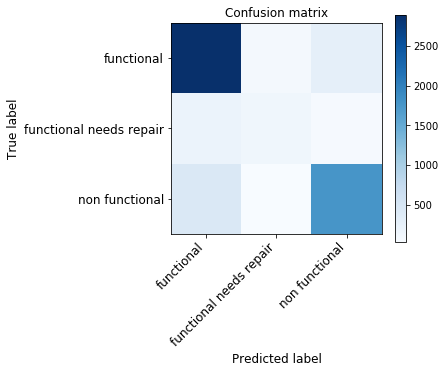

In [35]:
# 2. modelRFC4 for X_test
# Compute confusion matrix 
predict=modelRFC4.predict(X_test)
cm = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.88 0.03 0.09]
 [0.5  0.33 0.17]
 [0.2  0.02 0.78]]


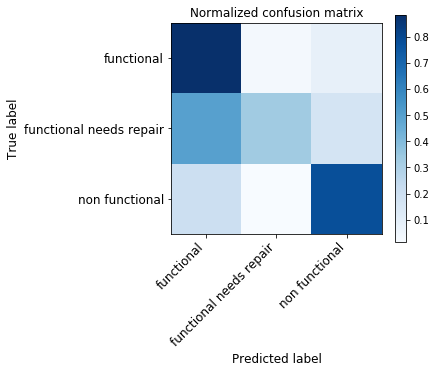

Test Score 0.8072390572390572


In [36]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
print('Test Score', cm.diagonal().sum()/float(cm.sum()))

#### The result shows the 'functional needs repair' does not have a good prediction. Most of the real ones end up in 'functional'.

Confusion matrix, without normalization
[[2984   47  237]
 [ 230  119   63]
 [ 489   28 1743]]


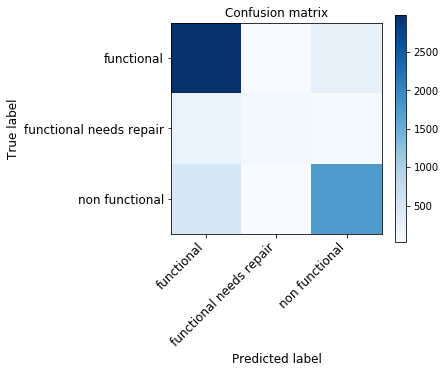

In [47]:
# 3. modelRFC6 for X_test 
# Compute confusion matrix 
predict=modelRFC6.predict(X_test)
cm = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.91 0.01 0.07]
 [0.56 0.29 0.15]
 [0.22 0.01 0.77]]


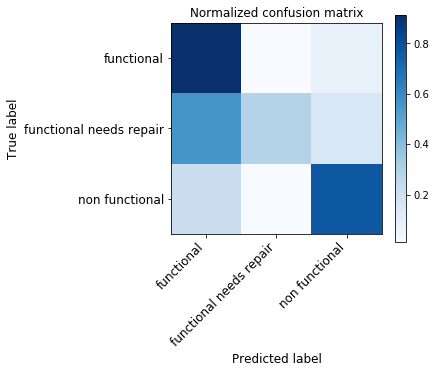

Test Score 0.8158249158249158


In [48]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
print('Test Score', cm.diagonal().sum()/float(cm.sum()))

- Fit Model

In [78]:
df_test=pd.read_csv('new_data/testset_clean_dummy.csv')

In [79]:
df_test.shape

(14850, 108)

In [80]:
df_test.head(5)

,id,existing year,gps_height,longitude,latitude,num_private,population,installer_ces,installer_community,installer_danida,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,50785,1.0,1996,35.290799,-4.059696,0,321,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,51630,13.0,1569,36.656709,-3.309214,0,300,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,17168,3.0,1567,34.767863,-5.004344,0,500,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,45559,26.0,267,38.058046,-9.418672,0,250,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,49871,13.0,1260,35.006123,-10.950412,0,60,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [81]:
# df_test.dtypes

In [82]:
df_test['existing year'] = df_test['existing year'].replace({'unknown':0})
df_test['existing year'] = df_test['existing year'].apply(pd.to_numeric)

In [83]:
df_test['existing year'].dtypes

dtype('float64')

In [84]:
df_test_nom=(df_test - df_test.min())/(df_test.max() - df_test.min())

In [85]:
predict_rfc=modelRFC3.predict(df_test_nom)

In [86]:
predict_rfc[:5]

array(['functional', 'functional', 'functional', 'non functional',
       'functional'], dtype=object)

In [87]:
df_test['status_group']=predict_rfc

In [88]:
df_test[['id','status_group']].head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [89]:
df_test[['id','status_group']].to_csv('result/outputRFC2.csv',index=False)

In [45]:
# 2
df_test=pd.read_csv('new_data/testset_clean_dummy.csv')
df_test['existing year'] = df_test['existing year'].replace({'unknown':0})
df_test['existing year'] = df_test['existing year'].apply(pd.to_numeric)
predict_rfc2=modelRFC4.predict(df_test)

In [46]:
predict_rfc2[:5]

array(['functional', 'functional', 'functional', 'non functional',
       'functional'], dtype=object)

In [47]:
df_test['status_group']=predict_rfc2
df_test[['id','status_group']].head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [48]:
df_test[['id','status_group']].to_csv('result/outputRFC3.csv',index=False)

In [49]:
# 3
df_test=pd.read_csv('new_data/testset_clean_dummy.csv')
df_test['existing year'] = df_test['existing year'].replace({'unknown':0})
df_test['existing year'] = df_test['existing year'].apply(pd.to_numeric)
predict_rfc2=modelRFC6.predict(df_test)

In [50]:
predict_rfc2[:5]

array(['functional', 'functional', 'functional', 'non functional',
       'functional'], dtype=object)

In [51]:
df_test['status_group']=predict_rfc2
df_test[['id','status_group']].head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [52]:
df_test[['id','status_group']].to_csv('result/outputRFC4.csv',index=False)

### 2.Xgboost

- Train and Score Models(Validation)

In [163]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

In [194]:
# df_train_xg=pd.read_csv('new_data/trainset_clean_dummy.csv')

In [195]:
# df_train_xg.shape

In [164]:
y_train.value_counts()

functional                 28991
non functional             20564
functional needs repair     3905
Name: status_group, dtype: int64

In [196]:
y_train1=y_train.replace({'functional':2,'non functional':0,'functional needs repair':1})

In [197]:
# type(y_train)
# y_train.dtypes
print(y_train1.value_counts())
y_train1.apply(pd.to_numeric)
print(len(y_train1))
print(type(y_train1[1]))

2    28991
0    20564
1     3905
Name: status_group, dtype: int64
53460
<class 'numpy.int64'>


In [198]:
for col in df_train.columns:
    if col not in df_test.columns:
        print(col)

In [199]:
dtrain = xgb.DMatrix(X_train, label=y_train1, missing = -999.0)

D:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [200]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 3,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.5,       # 生成树时进行的列采样
    'min_child_weight': 2,
    'eval_metric': 'merror',
    'n_monte_carlo':1,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.010,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}
plst = params.items()
num_rounds = 500

In [201]:
xg_start = time.time()
xgclassifier = xgb.train(plst, dtrain, num_rounds)
xg_end = time.time()
print('Execution time: ',(xg_end-xg_start))

Executation time:  351.0343027114868


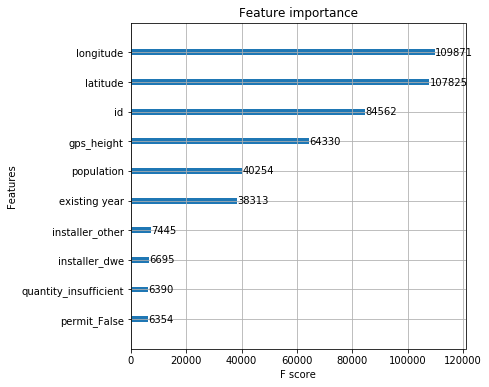

In [202]:
plot_importance(xgclassifier,max_num_features=10)
plt.show()

In [203]:
dtest = xgb.DMatrix(X_test)
predict_xg = xgclassifier.predict(dtest)

In [204]:
predict_xg

array([2., 2., 0., ..., 0., 2., 2.], dtype=float32)

In [205]:
y_test1=y_test.replace({'functional':2,'non functional':0,'functional needs repair':1})

In [206]:
y_test1[:10]

46949    2
51178    2
38686    0
54767    0
34402    0
35199    0
50131    2
55026    2
51204    2
19475    0
Name: status_group, dtype: int64

In [207]:
accuracy_score(y_test1,predict_xg)

0.8094276094276094

- Fit Model

In [208]:
df_test_xg=pd.read_csv('new_data/testset_clean_dummy.csv')

In [209]:
df_test_xg[:5]

,id,existing year,gps_height,longitude,latitude,num_private,population,installer_ces,installer_community,installer_danida,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,50785,1.0,1996,35.290799,-4.059696,0,321,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,51630,13.0,1569,36.656709,-3.309214,0,300,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,17168,3.0,1567,34.767863,-5.004344,0,500,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,45559,26.0,267,38.058046,-9.418672,0,250,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,49871,13.0,1260,35.006123,-10.950412,0,60,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [210]:
df_test_xg.dtypes

id                                            int64
existing year                                object
gps_height                                    int64
longitude                                   float64
latitude                                    float64
num_private                                   int64
population                                    int64
installer_ces                                 int64
installer_community                           int64
installer_danida                              int64
installer_dwe                                 int64
installer_government                          int64
installer_hesawa                              int64
installer_individual                          int64
installer_kkkt                                int64
installer_other                               int64
installer_rwe                                 int64
installer_tcrs                                int64
installer_unknown                             int64
basin_Intern

In [211]:
df_test_xg['existing year'] = df_test_xg['existing year'].replace({'unknown':0})
df_test_xg['existing year'] = df_test_xg['existing year'].apply(pd.to_numeric)

In [212]:
df_test_xg['existing year'].dtypes

dtype('float64')

In [213]:
dtest1 = xgb.DMatrix(df_test_xg,missing = -999.0)
type(dtest1)
predict_xg_test = xgclassifier.predict(dtest1)

In [214]:
predict_xg_test[:10]

array([2., 2., 2., 0., 2., 2., 2., 0., 0., 2.], dtype=float32)

In [220]:
# predict_xg_test[2]='functional'
# predict_xg_test[0]='non functional'
# predict_xg_test[1]='functional needs repair'
predict_xg_test2=pd.DataFrame(predict_xg_test)
predict_xg_test3=predict_xg_test2.replace({2:'functional',0:'non functional',1:'functional needs repair'})

In [223]:
predict_xg_test3[0][:10]

0        functional
1        functional
2        functional
3    non functional
4        functional
5        functional
6        functional
7    non functional
8    non functional
9        functional
Name: 0, dtype: object

In [224]:
data_xg={'ID':df_test_xg['id'], 'status_group': predict_xg_test3[0]}
submit_xg=pd.DataFrame(data=data_xg)
print(submit_xg[:10])
submit_xg.to_csv('result/outputXG.csv', index=False)

      ID    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
5  52449      functional
6  24806      functional
7  28965  non functional
8  36301  non functional
9  54122      functional


### 4.Gradient Boosting

In [90]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [91]:
df_train_gb=pd.read_csv('new_data/trainset_clean_dummy.csv')

In [92]:
df_train_gb.shape

(59400, 109)

In [93]:
df_train_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 109 entries, id to waterpoint_type_group_other
dtypes: float64(2), int64(104), object(3)
memory usage: 49.4+ MB


In [113]:
df_test_gb=pd.read_csv('new_data/testset_clean_dummy.csv')

In [114]:
df_test_gb.shape

(14850, 108)

In [115]:
df_test_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Columns: 108 entries, id to waterpoint_type_group_other
dtypes: float64(2), int64(105), object(1)
memory usage: 12.2+ MB


In [97]:
# df_test_gb.dtypes

In [98]:
for col in df_train_gb.columns:
    if col not in df_test_gb.columns:
        print(col)

status_group


In [99]:
import types

In [100]:
for col in df_train_gb.columns:
    if type(col)==object:
        print(col)

In [101]:
for col in df_train_gb.columns:
    if df_train_gb[col].dtypes==object:
        print(col)

existing year
population
status_group


In [102]:
for col in df_test_gb.columns:
    if df_test_gb[col].dtypes==object:
        print(col)

existing year


In [103]:
df_train_gb['existing year'] = df_train_gb['existing year'].replace({'unknown':0})

In [104]:
df_train_gb['existing year'] = df_train_gb['existing year'].apply(pd.to_numeric)
df_train_gb['existing year'].dtypes

dtype('int64')

In [105]:
df_train_gb['population']=df_train_gb['population'].replace({'<built-in function zeros>':0.0})

In [106]:
df_train_gb['population'] = df_train_gb['population'].apply(pd.to_numeric)
df_train_gb['population'].dtypes

dtype('float64')

In [116]:
df_test_gb['existing year'] = df_test_gb['existing year'].replace({'unknown':0})
df_test_gb['existing year'] = df_test_gb['existing year'].apply(pd.to_numeric)
df_test_gb['existing year'].dtypes

dtype('float64')

- Split training datasets to training and validation sets

In [109]:
X_train_gb, X_val_gb, y_train_gb, y_val_gb = train_test_split(df_train_gb.loc[:, df_train_gb.columns != 'status_group'], df_train_gb['status_group'], test_size=0.1, random_state=10)
print(len(X_train_gb), len(X_val_gb))

53460 5940


- Train and Score Models(Validation)

In [110]:
def gb_model(X_train, X_val, y_train, y_val):
#     param_grid = {'learning_rate': [0.075, 0.7],
#                   'max_depth': [13, 14],
#                   'min_samples_leaf': [15, 16],
#                   'max_features': [1.0],
#                   'n_estimators': [100, 200]} 

    params= {'learning_rate': 0.075,
                  'max_depth': 14,
                  'min_samples_leaf': 16,
                  'max_features': 1.0,
                  'n_estimators': 100}  

#     gb_classifier = GridSearchCV(estimator=GradientBoostingClassifier(),
#                              param_grid=param_grid,
#                              n_jobs=-1)

#     best_params = gb_classifier.best_params_
#     print(best_params)
    
    gb_classifier=GradientBoostingClassifier(**params)
    gb_classifier.fit(X_train, y_train)

    validation_accuracy = gb_classifier.score(X_val, y_val)
    print('Validation accuracy: ', validation_accuracy)
    return gb_classifier

In [111]:
gb_start = time.time()
gb_classifier=gb_model(X_train_gb, X_val_gb, y_train_gb, y_val_gb)
gb_end = time.time()
print('Execution time: ',(gb_end-gb_start))

Validation accuracy:  0.8104377104377104
Execution time:  894.3791055679321


- Fit model

In [117]:
#          best_params = {'learning_rate': [0.075],
#                         'max_depth': [14],
#                         'min_samples_leaf': [16],
#                         'max_features': [1.0],
#                         'n_estimators': [100]}                      

#          estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
#                                  param_grid=best_params,
#                                  n_jobs=-1)  
predictions = gb_classifier.predict(df_test_gb)

In [118]:
print(predictions[:10])

['functional' 'functional' 'functional' 'non functional' 'functional'
 'functional' 'functional' 'non functional' 'non functional' 'functional']


In [122]:
df_test_gb['status_group']=predictions
print(df_test_gb.status_group[:10])
print(df_test_gb[['id','status_group']][:10])
# data={'ID':df_test_gb['id'], 'status_group': predictions}
# submit_gb=pd.DataFrame(data=data)
# print(submit_gb[:10])
# # vals_to_replace = {2:'functional', 1:'functional needs repair',
# #                0:'non functional'}
# # df_test_gb.status_group = df_test_gb.status_group.replace(vals_to_replace)        
# submit_gb.to_csv('result/outputGB.csv', index=False)
df_test_gb[['id','status_group']].to_csv('result/outputGB2.csv', index=False)

['functional' 'functional' 'functional' 'non functional' 'functional'
 'functional' 'functional' 'non functional' 'non functional' 'functional']
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
5  52449      functional
6  24806      functional
7  28965  non functional
8  36301  non functional
9  54122      functional
